In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
import seaborn as sns
import statsmodels.api as sm

%matplotlib inline

In [3]:
features = pd.read_pickle("extended_page_features.pkl")

In [5]:
features.columns

Index(['page_ct', 'page_id', 'pageviews', 'pageviews_with_clicks', 'quality',
       'references_count', 'revision_id', 'text_length', 'title', 'topics',
       'wikicode_len'],
      dtype='object')

In [7]:
features.head(1)

,page_ct,page_id,pageviews,pageviews_with_clicks,quality,references_count,revision_id,text_length,title,topics,wikicode_len
0,0.000166,1677,6012,1,"{'B': 0.23476830009433253, 'C': 0.216270112996...",46.0,891285516,22280.0,Alfonso XIII of Spain,{'STEM.Information science': 0.003651232252435...,42710


In [6]:
features100pv = features[features.pageviews>=100]
len(features100pv)

916810

Convert quality in continue form:

In [12]:
features_list = []

quality_map = {
    'Stub': 0,
    'Start': 1,
    'B': 2,
    'C': 3,
    'GA': 4,
    'FA': 5
}

for index, row in features100pv.dropna().iterrows():
    row = row.to_dict()
    quality = 0
    for k, v in row['quality'].items():
        quality += v*quality_map[k]
    row['quality'] = quality/5
    for topic, value in row['topics'].items():
        row[topic.replace(".", "-").replace(" ", "_")] = value
    features_list.append(row)
    
expanded_features = pd.DataFrame(features_list)
expanded_features.head(3)

,page_ct,page_id,pageviews,pageviews_with_clicks,quality,references_count,revision_id,text_length,title,topics,...,Culture-Internet_culture,Geography-Bodies_of_water,Culture-Media,STEM-Mathematics,Culture-Language_and_literature,STEM-Space,Geography-Oceania,Culture-Performing_arts,History_And_Society-Politics_and_government,Culture-Sports
0,0.000166,1677,6012,1,0.695794,46.0,891285516,22280.0,Alfonso XIII of Spain,{'STEM.Information science': 0.003651232252435...,...,0.000587,0.000810,0.001328,0.000320,0.499362,0.000130,0.002057,0.004339,0.038185,0.009928
1,0.001698,1697,9421,16,0.641531,35.0,890614039,13759.0,Ambergris,{'STEM.Information science': 0.004057048281290...,...,0.002198,0.002642,0.007353,0.000381,0.159867,0.000886,0.042054,0.001511,0.009555,0.001047
2,0.000610,1806,88478,54,0.737660,201.0,893125894,56909.0,Arnold Schwarzenegger,{'STEM.Information science': 0.002324932622534...,...,0.043977,0.000298,0.045726,0.000976,0.423473,0.000507,0.011102,0.004230,0.275174,0.010225


In [15]:
import math

expanded_features = expanded_features[(expanded_features.wikicode_len>0)&(expanded_features.references_count>0)].copy()
expanded_features["wikicode_len_log"] = expanded_features["wikicode_len"].apply(lambda r: math.log(r))
expanded_features["references_count_log"] = expanded_features["references_count"].apply(lambda r: math.log(r))
expanded_features["pageviews_log"] = expanded_features["pageviews"].apply(lambda r: math.log(r))

expanded_features.head(10)

,page_ct,page_id,pageviews,pageviews_with_clicks,quality,references_count,revision_id,text_length,title,topics,...,STEM-Mathematics,Culture-Language_and_literature,STEM-Space,Geography-Oceania,Culture-Performing_arts,History_And_Society-Politics_and_government,Culture-Sports,wikicode_len_log,references_count_log,pageviews_log
0,0.000166,1677,6012,1,0.695794,46.0,891285516,22280.0,Alfonso XIII of Spain,{'STEM.Information science': 0.003651232252435...,...,0.000320,0.499362,0.000130,0.002057,0.004339,0.038185,0.009928,10.662188,3.828641,8.701513
1,0.001698,1697,9421,16,0.641531,35.0,890614039,13759.0,Ambergris,{'STEM.Information science': 0.004057048281290...,...,0.000381,0.159867,0.000886,0.042054,0.001511,0.009555,0.001047,10.106836,3.555348,9.150697
2,0.000610,1806,88478,54,0.737660,201.0,893125894,56909.0,Arnold Schwarzenegger,{'STEM.Information science': 0.002324932622534...,...,0.000976,0.423473,0.000507,0.011102,0.004230,0.275174,0.010225,11.999928,5.303305,11.390509
3,0.004725,1950,5714,27,0.748874,386.0,892157279,118295.0,American Civil Liberties Union,{'STEM.Information science': 0.031999268578124...,...,0.001530,0.149085,0.000382,0.007118,0.000827,0.978896,0.002787,12.128576,5.955837,8.650675
4,0.009235,2250,758,7,0.515631,27.0,881613783,14787.0,Abiotic stress,{'STEM.Information science': 0.003271473821335...,...,0.000523,0.019681,0.001383,0.002469,0.000467,0.004306,0.001028,10.163117,3.295837,6.630683
5,0.000961,2529,1041,1,0.391104,4.0,893006184,8189.0,Alexandra,"{'STEM.Physics': 0.0005771833144007775, 'STEM....",...,0.000431,0.856611,0.000740,0.008241,0.026143,0.010208,0.008182,9.455324,1.386294,6.947937
6,0.000569,2927,7029,4,0.676419,233.0,893294405,58379.0,Albanians,{'STEM.Information science': 0.004956860271514...,...,0.000578,0.113042,0.000357,0.001242,0.001688,0.037175,0.000859,12.109435,5.451038,8.857800
7,0.000374,3764,16049,6,0.521746,43.0,892908078,43549.0,Bavaria,{'STEM.Information science': 0.007260904817961...,...,0.000704,0.059214,0.000192,0.001898,0.004454,0.023281,0.004830,11.268763,3.761200,9.683402
8,0.000000,4823,5605,0,0.944160,16.0,890632454,34839.0,Balkan Wars,{'STEM.Information science': 0.001404058693483...,...,0.000382,0.070067,0.000799,0.002943,0.002497,0.130759,0.001984,10.961226,2.772589,8.631414
9,0.003355,5385,2981,10,0.648760,19.0,891025099,10298.0,Candela,{'STEM.Information science': 0.000527704845286...,...,0.004259,0.007350,0.008409,0.002324,0.000733,0.002062,0.001093,9.520249,2.944439,8.000014


-----
#### Page length distribution (log):

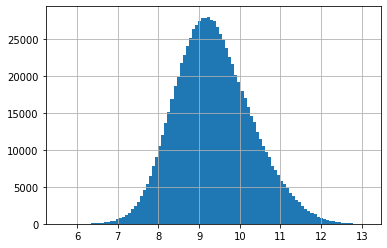

In [17]:
expanded_features.wikicode_len_log.hist(bins=100)

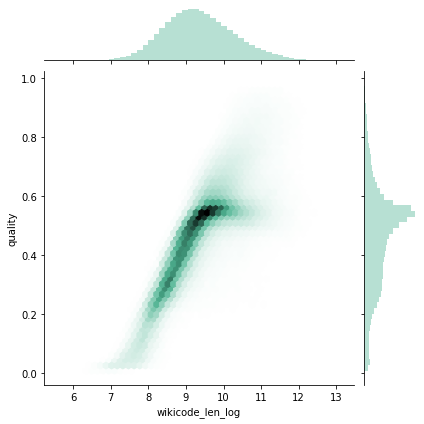

In [20]:
sns.jointplot(expanded_features.wikicode_len_log, expanded_features.quality, kind="hex", color="#4CB391")

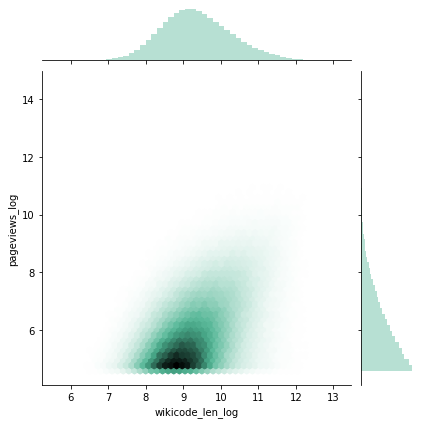

In [21]:
sns.jointplot(expanded_features.wikicode_len_log, expanded_features.pageviews_log, kind="hex", color="#4CB391")

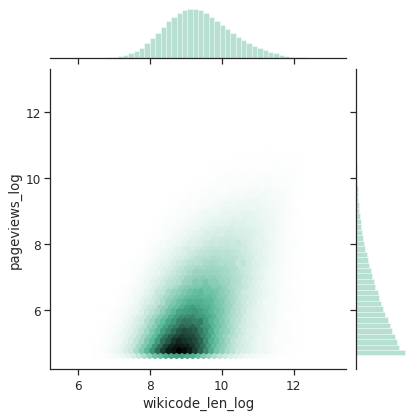

In [95]:
tmp = expanded_features[expanded_features.pageviews_log<13]

sns.jointplot(tmp.wikicode_len_log, tmp.pageviews_log, kind="hex", color="#4CB391")

Select top and bottom 40%. Exclude the middle-length articles:

In [29]:
short_upperbound = expanded_features.wikicode_len.quantile(0.4)
short_upperbound

8678.0

In [28]:
long_lowerbound = expanded_features.wikicode_len.quantile(0.6)
long_lowerbound

13834.0

In [31]:
expanded_features["length_class"] = expanded_features.wikicode_len\
    .apply(lambda r: 0 if r <= short_upperbound else 1 if r >= long_lowerbound else 0.5)
expanded_features.head(1)

,page_ct,page_id,pageviews,pageviews_with_clicks,quality,references_count,revision_id,text_length,title,topics,...,Culture-Language_and_literature,STEM-Space,Geography-Oceania,Culture-Performing_arts,History_And_Society-Politics_and_government,Culture-Sports,wikicode_len_log,references_count_log,pageviews_log,length_class
0,0.000166,1677,6012,1,0.695794,46.0,891285516,22280.0,Alfonso XIII of Spain,{'STEM.Information science': 0.003651232252435...,...,0.499362,0.00013,0.002057,0.004339,0.038185,0.009928,10.662188,3.828641,8.701513,1.0


In [32]:
expanded_features.columns

Index(['page_ct', 'page_id', 'pageviews', 'pageviews_with_clicks', 'quality',
       'references_count', 'revision_id', 'text_length', 'title', 'topics',
       'wikicode_len', 'STEM-Information_science', 'STEM-Physics',
       'Culture-Arts', 'Assistance-Contents_systems', 'Geography-Countries',
       'STEM-Geosciences', 'Geography-Cities', 'Geography-Landforms',
       'STEM-Engineering', 'STEM-Time', 'Culture-Philosophy_and_religion',
       'History_And_Society-Transportation', 'STEM-Technology',
       'Culture-Food_and_drink', 'Culture-Visual_arts',
       'History_And_Society-History_and_society',
       'History_And_Society-Education', 'Assistance-Maintenance',
       'Assistance-Files', 'STEM-Science',
       'History_And_Society-Military_and_warfare', 'Geography-Maps',
       'STEM-Meteorology', 'Geography-Europe', 'Culture-Plastic_arts',
       'Culture-Entertainment', 'Assistance-Article_improvement_and_grading',
       'History_And_Society-Business_and_economics', 'Cultur

In [46]:
expanded_features_binary_len = expanded_features[expanded_features.length_class!=0.5].copy()
valid_features = expanded_features_binary_len.drop("page_id", axis=1)\
        .drop("title", axis=1)\
        .drop("revision_id", axis=1)\
        .drop("topics", axis=1)\
        .drop("quality", axis=1)\
        .drop("text_length", axis=1)\
        .drop("wikicode_len", axis=1)\
        .drop("wikicode_len_log", axis=1)\
        .drop("pageviews", axis=1)\
        .drop("references_count", axis=1)\
        .drop("page_ct", axis=1)\
        .drop("pageviews_with_clicks", axis=1)
        
valid_features.columns

Index(['STEM-Information_science', 'STEM-Physics', 'Culture-Arts',
       'Assistance-Contents_systems', 'Geography-Countries',
       'STEM-Geosciences', 'Geography-Cities', 'Geography-Landforms',
       'STEM-Engineering', 'STEM-Time', 'Culture-Philosophy_and_religion',
       'History_And_Society-Transportation', 'STEM-Technology',
       'Culture-Food_and_drink', 'Culture-Visual_arts',
       'History_And_Society-History_and_society',
       'History_And_Society-Education', 'Assistance-Maintenance',
       'Assistance-Files', 'STEM-Science',
       'History_And_Society-Military_and_warfare', 'Geography-Maps',
       'STEM-Meteorology', 'Geography-Europe', 'Culture-Plastic_arts',
       'Culture-Entertainment', 'Assistance-Article_improvement_and_grading',
       'History_And_Society-Business_and_economics', 'Culture-Broadcasting',
       'Culture-Crafts_and_hobbies', 'STEM-Chemistry', 'STEM-Medicine',
       'STEM-Biology', 'Culture-Internet_culture', 'Geography-Bodies_of_water',
 

#### Train the logistic regression

In [47]:
X = valid_features.drop("length_class", axis=1)
y = valid_features["length_class"]

In [48]:
logit = sm.Logit(y, X)
result = logit.fit()

print(result.summary())

Optimization terminated successfully.
         Current function value: 0.371580
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:           length_class   No. Observations:               683199
Model:                          Logit   Df Residuals:                   683154
Method:                           MLE   Df Model:                           44
Date:                Sat, 05 Oct 2019   Pseudo R-squ.:                  0.4639
Time:                        23:04:17   Log-Likelihood:            -2.5386e+05
converged:                       True   LL-Null:                   -4.7356e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                                  coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------
STEM-Information_science                  

Optimization terminated successfully.
         Current function value: 0.371580
         Iterations 7


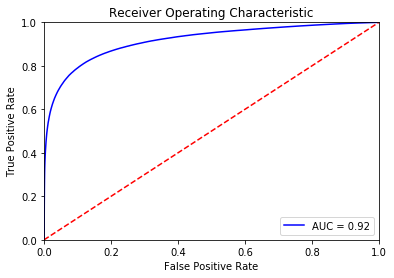

In [49]:
import matplotlib.pyplot as plt
from sklearn import metrics

logit = sm.Logit(y, X)
result = logit.fit()

y_pred = result.predict(X)

fpr, tpr, threshold = metrics.roc_curve(y, y_pred)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [50]:
expanded_features_binary_len["probability"] = y_pred

#### Propensity matching

In [54]:
bins = {}
for i in range(0, 10000):
    bins[i] = []

for index, row in expanded_features_binary_len.iterrows():
    bin_index = int(row['probability']*10000)
    bins[bin_index].append((row['page_id'], row['probability'], row['length_class']))

In [55]:
import networkx as nx
from networkx.algorithms import bipartite
import builtins

def get_matches(samples_bin):
    high_quality = [f for f in samples_bin if f[2]==1]
    low_quality = [f for f in samples_bin if f[2]==0]
    nodes = high_quality+low_quality
    graph_edges = []
    for hq in high_quality:
        for lq in low_quality:
            graph_edges.append((hq[0], lq[0], -1*builtins.abs(hq[1]-lq[1])))
    G = nx.Graph()
    G.add_nodes_from([n[0] for n in nodes])
    G.add_weighted_edges_from(graph_edges)
    matched_nodes = nx.algorithms.max_weight_matching(G, maxcardinality=True)
    return [edge for edge in matched_nodes]


In [57]:
from multiprocessing import Pool

p = Pool(40)
matches = p.map(get_matches, [v for k,v in bins.items()])

Create dataframe with matched articles

In [58]:
pages = []
for b in matches:
    for m in b:
        pages.append({"page_id": m[0]})
        pages.append({"page_id": m[1]})

matched_pages = pd.DataFrame(pages)
print(len(pages))
matched_pages.head()

206564


,page_id
0,1835266
1,873053
2,9790532
3,1893589
4,41960780


In [59]:
matched_features = expanded_features_binary_len.merge(matched_pages, on="page_id")
len(matched_features)

206564

## Difference and statistical test

In [61]:
print(matched_features[(matched_features.length_class==0)].page_ct.mean())
print(matched_features[(matched_features.length_class==1)].page_ct.mean())

0.00680320695352087
0.002774815664611685


In [4]:
positive = matched_features[matched_features.length_class==1]
negative = matched_features[matched_features.length_class==0]

In [6]:
from scipy.stats import mannwhitneyu

# compare distributions
stat, p = mannwhitneyu(positive.page_ct, 
                       negative.page_ct,
                       alternative="two-sided")
alpha = 0.001
if p < alpha:
    print('Statistics=%.3f, p < %.3f' % (stat, alpha))
else:
    print('Statistics=%.3f, p = %.3f' % (stat, p))
# interpret
if p > alpha:
    print('Same distribution (fail to reject H0)')
else:
    print('Different distribution (reject H0)')

Statistics=4284035079.500, p < 0.001
Different distribution (reject H0)


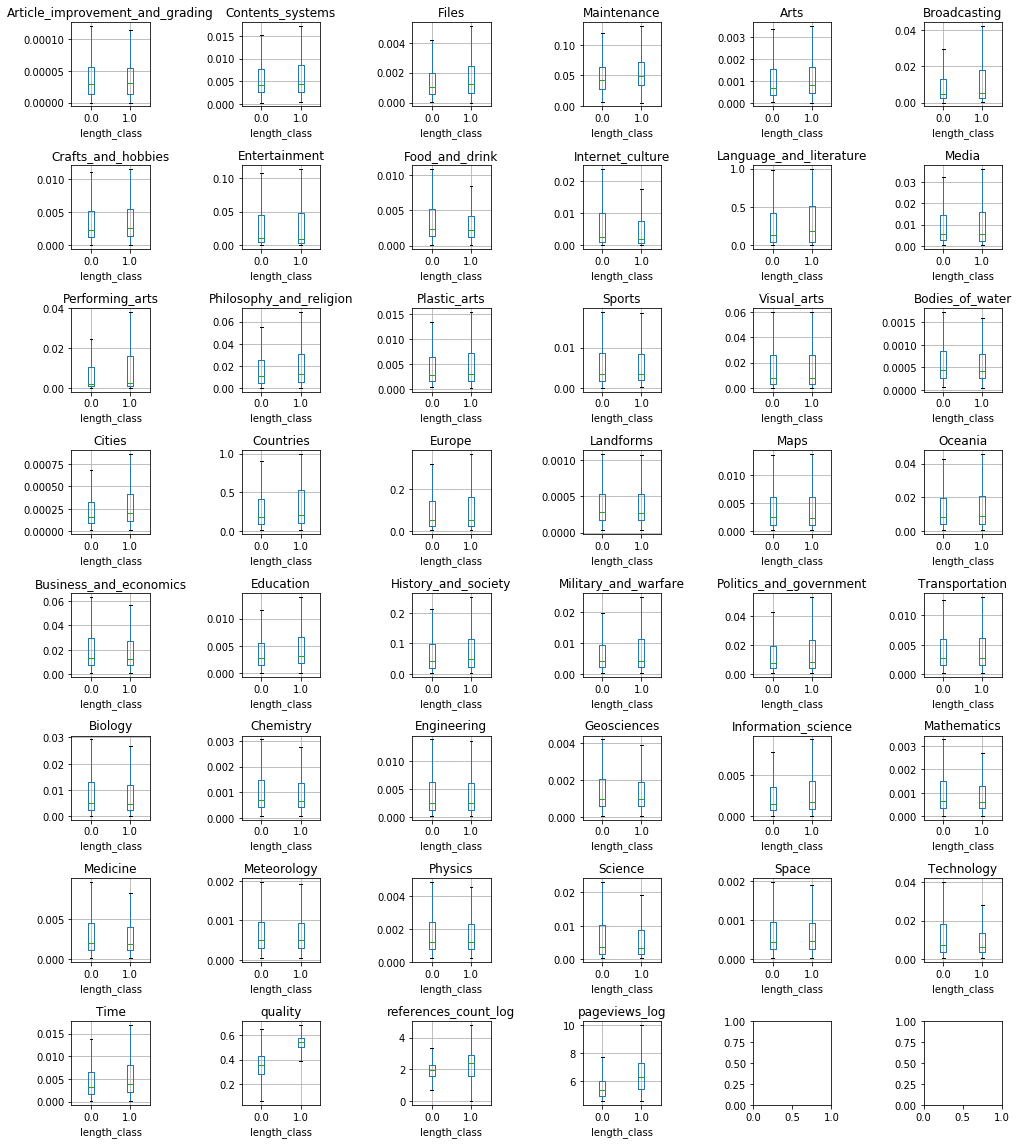

In [63]:
features = ['Assistance-Article_improvement_and_grading',
       'Assistance-Contents_systems', 'Assistance-Files',
       'Assistance-Maintenance', 'Culture-Arts', 'Culture-Broadcasting',
       'Culture-Crafts_and_hobbies', 'Culture-Entertainment',
       'Culture-Food_and_drink', 'Culture-Internet_culture',
       'Culture-Language_and_literature', 'Culture-Media',
       'Culture-Performing_arts', 'Culture-Philosophy_and_religion',
       'Culture-Plastic_arts', 'Culture-Sports', 'Culture-Visual_arts',
       'Geography-Bodies_of_water', 'Geography-Cities', 'Geography-Countries',
       'Geography-Europe', 'Geography-Landforms', 'Geography-Maps',
       'Geography-Oceania', 'History_And_Society-Business_and_economics',
       'History_And_Society-Education',
       'History_And_Society-History_and_society',
       'History_And_Society-Military_and_warfare',
       'History_And_Society-Politics_and_government',
       'History_And_Society-Transportation', 'STEM-Biology', 'STEM-Chemistry',
       'STEM-Engineering', 'STEM-Geosciences', 'STEM-Information_science',
       'STEM-Mathematics', 'STEM-Medicine', 'STEM-Meteorology', 'STEM-Physics',
       'STEM-Science', 'STEM-Space', 'STEM-Technology', 'STEM-Time',
       'quality',
       'references_count_log', 'pageviews_log']

row_count = math.ceil(len(features)/6)

fig, axs = plt.subplots(row_count, 6, figsize=(14,16))

for idx in range(0, len(features)):
    f = features[idx]
    matched_features.boxplot(f, by="length_class", showfliers=False, ax=axs[idx//6][idx%6])
    i=f.find("-")
    if i >= 0:
        axs[idx//6][idx%6].set_title(f[f.index("-")+1:])
    else:
        axs[idx//6][idx%6].set_title(f)
fig.suptitle('')
fig.tight_layout()

Text(0.5, 1.0, 'After matching')

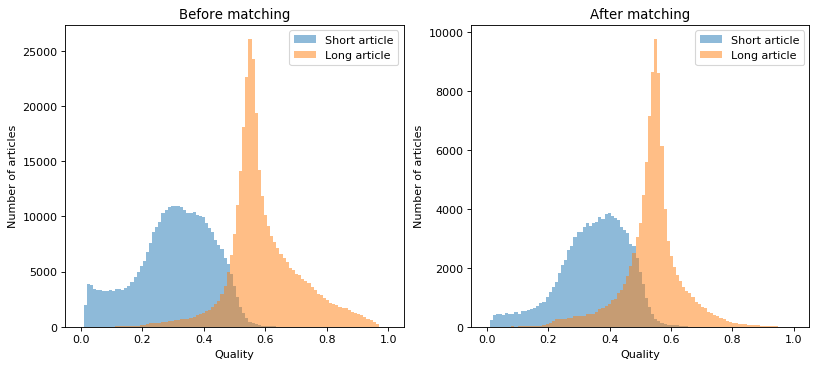

In [75]:
from matplotlib import pyplot
import numpy
import math
from matplotlib.pyplot import figure

figure(num=None, figsize=(12, 5), dpi=80, facecolor='w', edgecolor='k')

plt.subplot(121)

bins = numpy.linspace(0, 1, 100)

pyplot.hist(expanded_features[expanded_features.length_class==0].quality, bins, alpha=0.5, label='Short article')
pyplot.hist(expanded_features[expanded_features.length_class==1].quality, bins, alpha=0.5, label='Long article')
pyplot.legend(loc='upper right')
pyplot.xlabel("Quality")
pyplot.ylabel("Number of articles")
plt.title("Before matching")


plt.subplot(122)
bins = numpy.linspace(0, 1, 100)

limited=expanded_features[(expanded_features.pageviews>=100)].copy()

pyplot.hist(matched_features[matched_features.length_class==0].quality, bins, alpha=0.5, label='Short article')
pyplot.hist(matched_features[matched_features.length_class==1].quality, bins, alpha=0.5, label='Long article')
pyplot.legend(loc='upper right')
pyplot.xlabel("Quality")
pyplot.ylabel("Number of articles")
plt.title("After matching")

In [5]:
from scipy.stats import binned_statistic
import numpy as np
import builtins
import math

def get_stats(bin_samples, stat_type="mean"):
    if len(bin_samples)<1:
        return 
    means_list = []
    for i in range(0, 100):
        samples = np.random.choice(bin_samples, size=len(bin_samples))
        means_list.append(np.mean(samples))
    means_list = sorted(means_list)
    if stat_type=="mean":
        return means_list[len(means_list)//2]
    elif stat_type=="left":
        left_index = int(0.05*len(means_list))
        return means_list[left_index]
    elif stat_type=="right":
        right_index = builtins.min(len(means_list)-1, math.ceil(0.95*len(means_list)))
        return means_list[right_index]

def get_binned_stats(x, y, bins):
    binned = binned_statistic(x, y, 
                     bins=bins, 
                     statistic=lambda r: get_stats(r, "mean"))
    binned_low = binned_statistic(x, y, 
                     bins=bins, 
                     statistic=lambda r: get_stats(r, "left"))
    binned_up = binned_statistic(x, y,
                     bins=bins, 
                     statistic=lambda r: get_stats(r, "right"))
    bins_count = binned_statistic(x, y,
                     bins=bins, 
                     statistic="count")
    return pd.Series(binned.bin_edges).rolling(2, 2).mean().dropna(),\
            binned.statistic, binned_low.statistic, binned_up.statistic, bins_count.statistic


<Figure size 360x216 with 0 Axes>

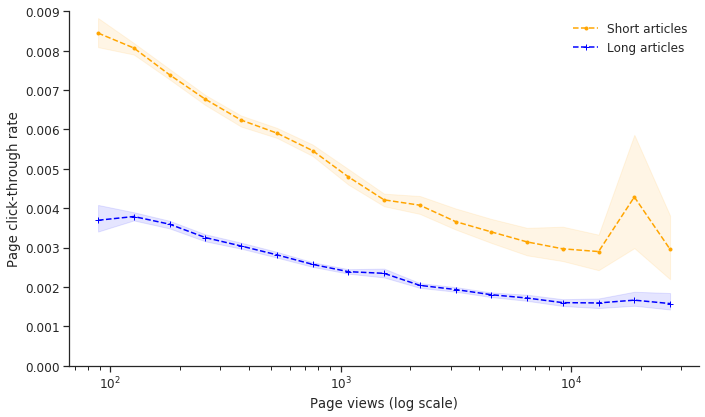

In [10]:
plt.figure(figsize=(5, 3), frameon=False)

fig, ax = plt.subplots(1, 1, figsize=(10,6))

sns.set_context("paper")
sns.set(font_scale = 1.1)
sns.set_style("white", {
    "font.family": "sans-serif",
    "font.serif": ['Helvetica'],
    "font.scale": 2
})
sns.set_style("ticks", {"xtick.major.size": 4,
                        "ytick.major.size": 4})


ax = plt.subplot(111)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

#######################################


import numpy as np
import math

bins = np.logspace(0, 4.5, 30, base=10)#np.arange(0, 12, 0.1)

lq=matched_features[matched_features.length_class==0]
hq=matched_features[matched_features.length_class==1]

bin_x, mean_values, lower, upper, count = get_binned_stats(
                        lq.pageviews_log.apply(lambda r: math.exp(r)), 
                        lq.page_ct, bins)



ax.plot(bin_x, mean_values, linestyle='--', marker=".", color="orange", label="Short articles")
ax.fill_between(bin_x, lower,upper, color = 'orange',alpha = 0.1)
plt.gca().set_xscale("log", nonposx='clip')

bin_x, mean_values, lower, upper, count = get_binned_stats(
                        hq.pageviews_log.apply(lambda r: math.exp(r)), 
                        hq.page_ct, bins)

ax.plot(bin_x, mean_values, linestyle='--', marker="+", color="blue", label="Long articles")
ax.fill_between(bin_x, lower,upper, color = 'blue',alpha = 0.1)
plt.gca().set_xscale("log", nonposx='clip')
ax.legend()

ax.set_ylim([0,0.009])


plt.xlabel("Page views (log scale)")
plt.ylabel('Page click-through rate')

#####################
leg = plt.legend()
leg.get_frame().set_linewidth(0.0)
plt.tight_layout()